Importing dependencies

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Device config

In [2]:
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


Data collection and loading

In [3]:
data=load_breast_cancer()
print(data)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [4]:
dataframe=pd.DataFrame(data.data,columns=data.feature_names)
dataframe.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
dataframe['target']=data.target
dataframe.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
dataframe.shape

(569, 31)

In [7]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [8]:
dataframe.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [9]:
dataframe['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

0 -> Malignant

1 -> Benign

In [10]:
dataframe.groupby('target').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
target,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


Separating features and target

In [11]:
X = dataframe.drop(columns='target',axis=1)
Y = dataframe['target']

In [12]:
print(X)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [13]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64


Splitting the data

In [14]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [15]:
print(X.shape,X_train.shape,X_test.shape)

(569, 30) (455, 30) (114, 30)


In [16]:
print(X_train)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
560        14.05         27.15           91.38      600.4          0.09929   
428        11.13         16.62           70.47      381.1          0.08151   
198        19.18         22.49          127.50     1148.0          0.08523   
203        13.81         23.75           91.56      597.8          0.13230   
41         10.95         21.35           71.90      371.1          0.12270   
..           ...           ...             ...        ...              ...   
299        10.51         23.09           66.85      334.2          0.10150   
534        10.96         17.62           70.79      365.6          0.09687   
493        12.46         12.83           78.83      477.3          0.07372   
527        12.34         12.27           78.94      468.5          0.09003   
168        17.47         24.68          116.10      984.6          0.10490   

     mean compactness  mean concavity  mean concave points  mea

Standardize the data

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
print(X_train)

[[-0.01330339  1.7757658  -0.01491962 ... -0.13236958 -1.08014517
  -0.03527943]
 [-0.8448276  -0.6284278  -0.87702746 ... -1.11552632 -0.85773964
  -0.72098905]
 [ 1.44755936  0.71180168  1.47428816 ...  0.87583964  0.4967602
   0.46321706]
 ...
 [-0.46608541 -1.49375484 -0.53234924 ... -1.32388956 -1.02997851
  -0.75145272]
 [-0.50025764 -1.62161319 -0.527814   ... -0.0987626   0.35796577
  -0.43906159]
 [ 0.96060511  1.21181916  1.00427242 ...  0.8956983  -1.23064515
   0.50697397]]


In [19]:
type(X_train)

numpy.ndarray

In [20]:
type(X_test)

numpy.ndarray

In [21]:
X_train = torch.from_numpy(X_train.astype(np.float32)).to(device)
X_test = torch.from_numpy(X_test.astype(np.float32)).to(device)

In [22]:
Y_train = torch.from_numpy(Y_train.to_numpy().astype(np.float32))
Y_test = torch.from_numpy(Y_test.to_numpy().astype(np.float32))

In [23]:
Y_train = torch.tensor(Y_train,dtype=torch.float32).to(device)
Y_test = torch.tensor(Y_test,dtype=torch.float32).to(device)

<ipython-input-23-992f632e1c12>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y_train = torch.tensor(Y_train,dtype=torch.float32).to(device)
<ipython-input-23-992f632e1c12>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y_test = torch.tensor(Y_test,dtype=torch.float32).to(device)


In [24]:
type(Y_train)

torch.Tensor

Neural Network Architecture

In [25]:
# define neural network architecture
class NeuralNet(nn.Module):
  def __init__(self,input_size,hidden_size,output_size):
    super(NeuralNet,self).__init__()
    self.fc1 = nn.Linear(input_size,hidden_size)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(hidden_size,output_size)
    self.sigmoid = nn.Sigmoid()

  def forward(self,x):
    out = self.fc1(x)
    out = self.relu(out)
    out = self.fc2(out)
    out = self.sigmoid(out)
    return out

In [26]:
# define hyperparameters
input_size = X_train.shape[1]
hidden_size = 64
output_size = 1
learning_rate = 0.001
num_epochs = 100

In [27]:
# initalize nn and move to gpu
model = NeuralNet(input_size,hidden_size,output_size).to(device)

In [28]:
# define loss and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(),lr=learning_rate)

In [29]:
# training the model
train_losses =[]
train_accuracies =[]


for epoch in range(num_epochs):
  model.train()
  optimizer.zero_grad()
  outputs = model(X_train)
  loss = criterion(outputs,Y_train.view(-1,1))
  loss.backward()
  optimizer.step()


  # calculate accuracy
  with torch.no_grad():
    predicted = outputs.round()
    correct = (predicted == Y_train.view(-1,1)).float().sum()
    accuracy = correct/Y_train.size(0)

  train_losses.append(loss.item())
  train_accuracies.append(accuracy.item())

  if (epoch+1) %10 ==0:
    print(f"Epoch : [{epoch+1}/{num_epochs}] , Loss: {loss.item():.3f}, Accuracy: {accuracy.item()*100 :.2f}")

Epoch : [10/100] , Loss: 0.562, Accuracy: 89.45
Epoch : [20/100] , Loss: 0.442, Accuracy: 92.31
Epoch : [30/100] , Loss: 0.350, Accuracy: 93.63
Epoch : [40/100] , Loss: 0.281, Accuracy: 94.07
Epoch : [50/100] , Loss: 0.230, Accuracy: 94.95
Epoch : [60/100] , Loss: 0.193, Accuracy: 95.82
Epoch : [70/100] , Loss: 0.166, Accuracy: 96.48
Epoch : [80/100] , Loss: 0.146, Accuracy: 97.14
Epoch : [90/100] , Loss: 0.131, Accuracy: 97.14
Epoch : [100/100] , Loss: 0.119, Accuracy: 97.80


Model Evaluation

In [30]:
# on training data
model.eval()
with torch.no_grad():
  outputs = model(X_train)
  predicted = outputs.round()
  correct = (predicted == Y_train.view(-1,1)).float().sum()
  accuracy = correct/Y_train.size(0)
  print(f"Accuracy on training data: {accuracy.item()*100:.2f}")

Accuracy on training data: 97.80


In [31]:
# on test data
test_accuracies =[]
model.eval()
with torch.no_grad():
  outputs = model(X_test)
  predicted = outputs.round()
  correct = (predicted == Y_test.view(-1,1)).float().sum()
  test_accuracy = correct/Y_test.size(0)
  test_accuracies.append(test_accuracy.item())
  print(f"Accuracy on test data: {test_accuracy.item()*100:.2f}")


Accuracy on test data: 95.61


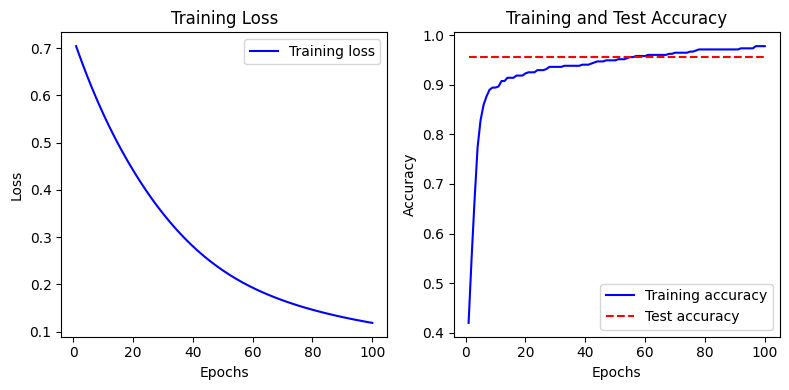

In [58]:
# plots
epochs = range(1, num_epochs + 1)

plt.figure(figsize=(8, 4))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, 'b', label='Training loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = 'upper right')

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, 'b', label='Training accuracy')
plt.plot(epochs, [test_accuracies[0]]*num_epochs, 'r--', label='Test accuracy')
plt.title('Training and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')

plt.tight_layout()
plt.show()

Prediction System

In [70]:
input_data = (13.17,18.66,85.98,534.6,0.1158,0.1231,0.1226,0.0734,0.2128,0.06777,0.2871,0.8937,
              1.897,24.25,0.006532,0.02336,0.02905,0.01215,0.01743,0.003643,15.67,27.95,102.8,759.4,
              0.1786,0.4166,0.5006,0.2088,0.39,0.1179)
# Convert the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Standardizing the input data
input_data_std = scaler.transform(input_data_reshaped)

# Convert the standardized data to a tensor and move it to the appropriate device
input_tensor = torch.from_numpy(input_data_std.astype(np.float32)).to(device)

# Making a prediction
model.eval()
with torch.no_grad():
    output = model(input_tensor)
    prediction_label = [torch.argmax(output, dim=1).item()]

# Print the prediction result
print(output)
print(prediction_label)

if prediction_label[0] == 0:
    print('The tumor is Malignant')
else:
    print('The tumor is Benign')

tensor([[0.1036]])
[0]
The tumor is Malignant


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
